In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os 

In [2]:
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path= os.path.join(curr_dir,"datasets","Valid")

Current Dir  c:\Users\milan\OneDrive\Documents\Dell\OneDrive\Desktop\disease-detection


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

C:\Users\milan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3540 - loss: 1.5108 - val_accuracy: 0.6567 - val_loss: 0.7724
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6668 - loss: 0.7046 - val_accuracy: 0.7233 - val_loss: 0.5505
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7381 - loss: 0.5727 - val_accuracy: 0.7533 - val_loss: 0.5239
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7706 - loss: 0.4958 - val_accuracy: 0.7500 - val_loss: 0.5477
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7867 - loss: 0.4703 - val_accuracy: 0.8200 - val_loss: 0.4520
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8335 - loss: 0.3765 - val_accuracy: 0.9067 - val_loss: 0.2412
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8926 - loss: 0.2735 - val_accuracy: 0.9000 - val_loss: 0.2456
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9402 - loss: 0.1612 - val_accuracy: 0.8967 - val_loss:

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.9057 - loss: 0.2534
Training accuracy: 0.9222221970558167


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 0.8811 - loss: 0.2637
Validation accuracy: 0.8766666650772095


In [12]:
cnn.save('trained_plant_disease_model.keras')

In [13]:
training_history.history

{'accuracy': [0.41999998688697815,
  0.6911110877990723,
  0.7144444584846497,
  0.7988888621330261,
  0.8122222423553467,
  0.8666666746139526,
  0.898888885974884,
  0.945555567741394,
  0.9555555582046509,
  0.9244444370269775],
 'loss': [1.1959221363067627,
  0.6486839056015015,
  0.618070662021637,
  0.4569776654243469,
  0.42047643661499023,
  0.313602477312088,
  0.26364707946777344,
  0.1480022668838501,
  0.12121019512414932,
  0.19591541588306427],
 'val_accuracy': [0.6566666960716248,
  0.7233333587646484,
  0.753333330154419,
  0.75,
  0.8199999928474426,
  0.9066666960716248,
  0.8999999761581421,
  0.8966666460037231,
  0.9100000262260437,
  0.8766666650772095],
 'val_loss': [0.772355318069458,
  0.5505126714706421,
  0.5239051580429077,
  0.5477182269096375,
  0.4520473778247833,
  0.24122381210327148,
  0.24555537104606628,
  0.23968103528022766,
  0.2615923583507538,
  0.29009705781936646]}

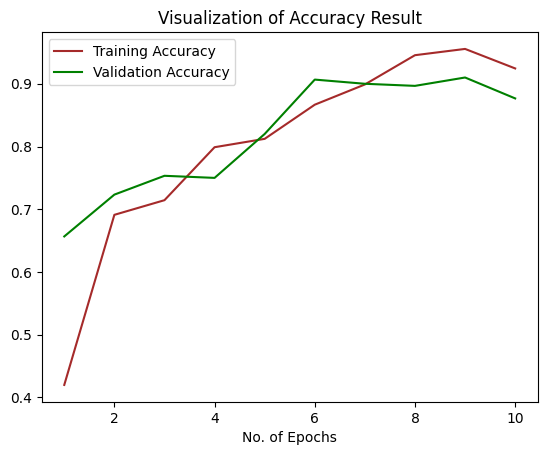

In [14]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()